<a href="https://colab.research.google.com/github/fabrizioaymone/titanic-challenge/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [ ]:
with zipfile.ZipFile("datasets/titanic/titanic.zip", "r") as zref:
    zref.extractall("datasets/titanic")

train = pd.read_csv("datasets/titanic/train.csv")
test = pd.read_csv("datasets/titanic/test.csv")

In [ ]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
all = pd.concat([train, test], sort = False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
#Fill missing numbers with median
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

In [ ]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


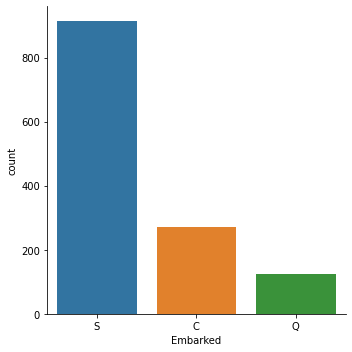

In [ ]:
sns.catplot(x='Embarked', kind='count', data=all)

In [ ]:
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def get_title(name):
    title_search = re.search('[a-zA-Z]+\\.', name)
    
    if title_search:
        return title_search.group(0)
    return ""

In [ ]:
all['Title'] = all['Name'].apply(get_title)

In [ ]:
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [ ]:
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'] = all['Title'].replace(['Dona.', 'Sir.', 'Lady.', 'Countess.', 'Don.', 'Jonkheer.', 'Dr.', 'Rev.'], 'Royal')
all['Title'] = all['Title'].replace(['Capt.', 'Major.', 'Col.'], 'Officer')

In [ ]:
all['Title'].value_counts()

Mr.        757
Miss.      264
Mrs.       198
Master.     61
Royal       22
Officer      7
Name: Title, dtype: int64

In [ ]:
all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,Mr.
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royal
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.
416,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,Mr.


In [ ]:

all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [ ]:
all['Family_Size'] = all['SibSp'] + all['Parch']
all['IsAlone'] = 0
all.loc[all['Family_Size']==0, 'IsAlone'] = 1
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs.,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs.,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,1


In [ ]:
all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs.,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs.,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,Mr.,0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Royal,0,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.,0,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,Mr.,0,1


In [ ]:
def get_prefix(ticket_name):
    prefix_search = re.search('.+ ', ticket_name)

    if prefix_search:
        return prefix_search.group(0)
    return ''

In [ ]:
all['Ticket_Prefix'] = all['Ticket'].apply(get_prefix)
all['Ticket_Prefix'].value_counts()

                961
PC               92
C.A.             46
SOTON/O.Q.       16
STON/O 2.        14
W./C.            14
CA.              12
A/5              12
SC/PARIS         11
A/5.             10
CA               10
F.C.C.            9
SOTON/OQ          8
C                 8
S.O.C.            7
STON/O2.          7
S.O./P.P.         7
A/4               6
SC/Paris          5
PP                4
SC/AH             4
A.5.              3
SOTON/O2          3
S.C./PARIS        3
F.C.              3
A/4.              3
A./5.             3
SC                2
P/PP              2
WE/P              2
W.E.P.            2
C.A./SOTON        1
SC/A.3            1
STON/OQ.          1
AQ/4              1
A. 2.             1
LP                1
SC/A4             1
Fa                1
S.W./PP           1
SC/AH Basle       1
A/S               1
SCO/W             1
SW/PP             1
W/C               1
S.O.P.            1
A4.               1
SO/C              1
S.P.              1
S.C./A.4.         1


In [ ]:
all = all.drop(['Ticket', 'Name', 'Ticket_Prefix'], axis=1)

In [ ]:
all.drop(['SibSp', 'Parch'], axis=1, inplace=True)
all = pd.get_dummies(all)


In [ ]:
all.head()

,PassengerId,Survived,Pclass,Age,Fare,Family_Size,IsAlone,Sex_female,Sex_male,Cabin_A,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer,Title_Royal
0,1,0.0,3,22.0,7.2500,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,2,1.0,1,38.0,71.2833,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,1.0,3,26.0,7.9250,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,4,1.0,1,35.0,53.1000,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0.0,3,35.0,8.0500,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


/home/whiterose/ml/my_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x7f914175d030>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

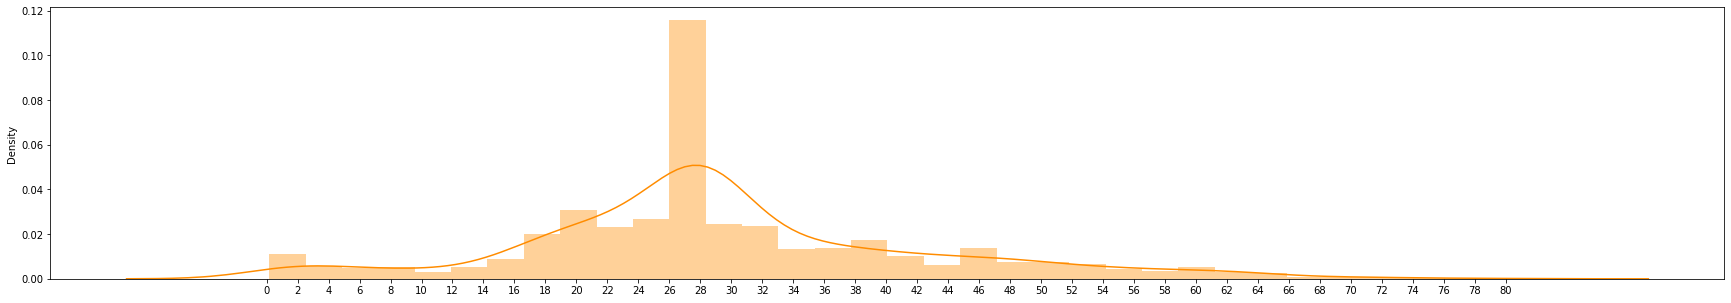

In [ ]:
plt.figure(figsize=(30,5))
sns.distplot(all.Age.values, label='all', color='darkorange')
plt.xticks(np.arange(0, max(all.Age.values)+1, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all.Age = scaler.fit_transform(all.Age.to_numpy().reshape(-1,1))

/home/whiterose/ml/my_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

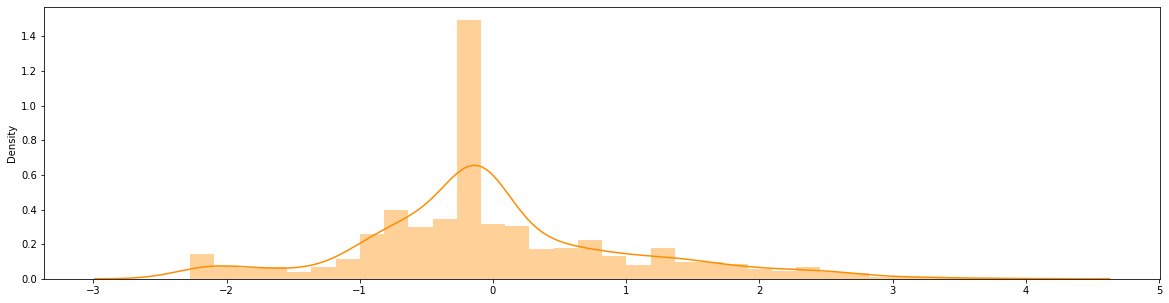

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(all.Age.values, label='all', color='darkorange')

In [ ]:
all.head()

,PassengerId,Survived,Pclass,Age,Fare,Family_Size,IsAlone,Sex_female,Sex_male,Cabin_A,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer,Title_Royal
0,1,0.0,3,-0.581628,7.2500,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,2,1.0,1,0.658652,71.2833,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,1.0,3,-0.271558,7.9250,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,4,1.0,1,0.426099,53.1000,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0.0,3,0.426099,8.0500,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


/home/whiterose/ml/my_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

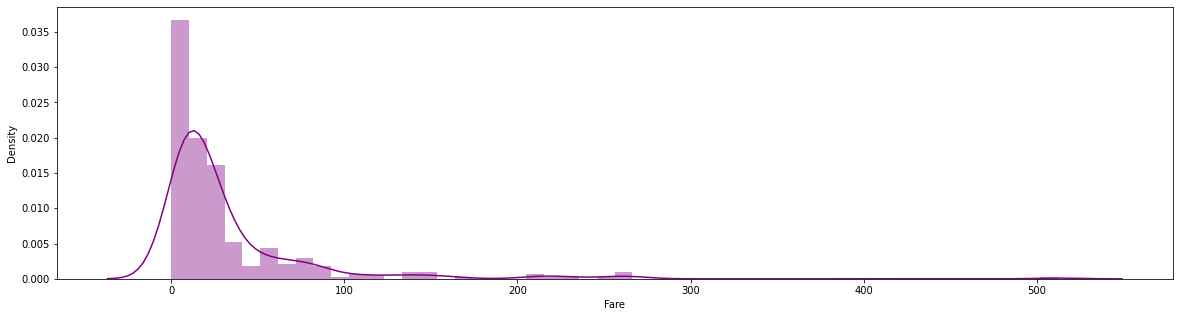

In [ ]:
plt.figure(figsize=(20, 5))
sns.distplot(all.Fare, color='purple')

In [ ]:
all.Fare = all.Fare.apply(lambda l: np.log(l+1))

/home/whiterose/ml/my_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

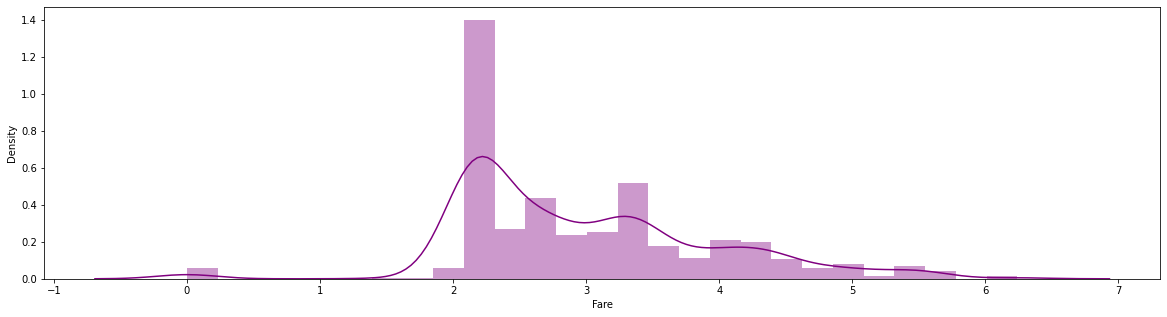

In [ ]:
plt.figure(figsize=(20, 5))
sns.distplot(all.Fare, color='purple')

In [ ]:
all.Fare = scaler.fit_transform(all.Fare.to_numpy().reshape(-1,1))

/home/whiterose/ml/my_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

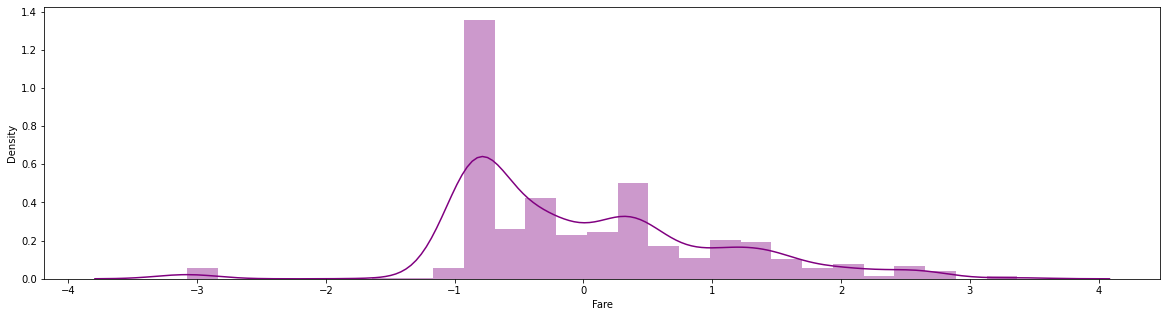

In [ ]:
plt.figure(figsize=(20, 5))
sns.distplot(all.Fare, color='purple')

In [ ]:
all.head()

,PassengerId,Survived,Pclass,Age,Fare,Family_Size,IsAlone,Sex_female,Sex_male,Cabin_A,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer,Title_Royal
0,1,0.0,3,-0.581628,-0.897786,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,2,1.0,1,0.658652,1.344455,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,1.0,3,-0.271558,-0.816539,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,4,1.0,1,0.426099,1.045102,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0.0,3,0.426099,-0.802170,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
all_train = all.loc[all['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    float64
 2   Pclass         891 non-null    int64  
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Family_Size    891 non-null    int64  
 6   IsAlone        891 non-null    int64  
 7   Sex_female     891 non-null    uint8  
 8   Sex_male       891 non-null    uint8  
 9   Cabin_A        891 non-null    uint8  
 10  Cabin_B        891 non-null    uint8  
 11  Cabin_C        891 non-null    uint8  
 12  Cabin_D        891 non-null    uint8  
 13  Cabin_E        891 non-null    uint8  
 14  Cabin_F        891 non-null    uint8  
 15  Cabin_G        891 non-null    uint8  
 16  Cabin_T        891 non-null    uint8  
 17  Embarked_C     891 non-null    uint8  
 18  Embarked_Q

In [ ]:
all_test = all.loc[all['Survived'].notna()==0]
all_test.drop('Survived', axis=1, inplace=True)
X_test = all_test

/tmp/ipykernel_37698/748620285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_test.drop('Survived', axis=1, inplace=True)


In [ ]:
X_train = all_train.drop('Survived', axis=1)
y_train = all_train.Survived

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_score_                                                 

0.8327721661054994

In [ ]:
rf_final = rf_random.best_estimator_

In [ ]:
y_predict = rf_final.predict(X_test)
y_predict = [int(x) for x in y_predict]
y_predict

In [ ]:
PassengerId = X_test['PassengerId']

In [ ]:
rfSub = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_predict})
rfSub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
rfSub.to_csv('datasets/titanic/rfSub.csv', index = False)